<a href="https://colab.research.google.com/github/Jan2309jr/agent-performance-prediction/blob/main/agent_performance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Know Your Data

##Import Libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

##Dataset Loading

In [159]:
df=pd.read_csv("https://raw.githubusercontent.com/Jan2309jr/agent-performance-prediction/refs/heads/main/Customer_support_data.csv")

##Dataset First View

In [160]:
df

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4


In [161]:
df.head(10)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
5,1cfde5b9-6112-44fc-8f3b-892196137a62,Email,Returns,Fraudulent User,NaN,a2938961-2833-45f1-83d6-678d9555c603,NaN,01/08/2023 15:13,01/08/2023 18:39,01-Aug-23,NaN,NaN,NaN,NaN,Desiree Newton,Emma Park,John Smith,0-30,Morning,5
6,11a3ffd8-1d6b-4806-b198-c60b5934c9bc,Outcall,Product Queries,Product Specific Information,NaN,bfcb562b-9a2f-4cca-aa79-fd4e2952f901,NaN,01/08/2023 15:31,01/08/2023 23:52,01-Aug-23,NaN,NaN,NaN,NaN,Shannon Hicks,Aiden Patel,Olivia Tan,>90,Morning,5
7,372b51a5-fa19-4a31-a4b8-a21de117d75e,Inbound,Returns,Exchange / Replacement,Very good,88537e0b-5ffa-43f9-bbe2-fe57a0f4e4ae,NaN,01/08/2023 16:17,01/08/2023 16:23,01-Aug-23,NaN,NaN,NaN,NaN,Laura Smith,Evelyn Kimura,Jennifer Nguyen,On Job Training,Evening,5
8,6e4413db-4e16-42fc-ac92-2f402e3df03c,Inbound,Returns,Missing,Shopzilla app and it's all coustomer care serv...,e6be9713-13c3-493c-8a91-2137cbbfa7e6,NaN,01/08/2023 21:03,01/08/2023 21:07,01-Aug-23,NaN,NaN,NaN,NaN,David Smith,Nathan Patel,John Smith,>90,Split,5
9,b0a65350-64a5-4603-8b9a-a24a4a145d08,Inbound,Shopzilla Related,General Enquiry,NaN,c7caa804-2525-499e-b202-4c781cb68974,NaN,01/08/2023 23:31,01/08/2023 23:36,01-Aug-23,NaN,NaN,NaN,NaN,Tabitha Ayala,Amelia Tanaka,Michael Lee,31-60,Evening,5


## Dataset Rows & Columns count

In [162]:
rows,cols=df.shape
df_rows_col_count=pd.DataFrame([[rows,cols]],columns=["rows","columns"])
df_rows_col_count

,rows,columns
0,85907,20


##Dataset Information


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [164]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


##Duplicate Values

In [165]:
df.duplicated().sum()

np.int64(0)

##Missing Values/Null Values

###Missing/Null values count

In [166]:
#checking if any missing values exist
df.isnull().values.any()

np.True_

In [167]:
#total no of missing values in dataset
df.isnull().sum().sum()

np.int64(435995)

In [168]:
#total no of missing values per column
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


###Visualization of missing/null values

####Heatmap

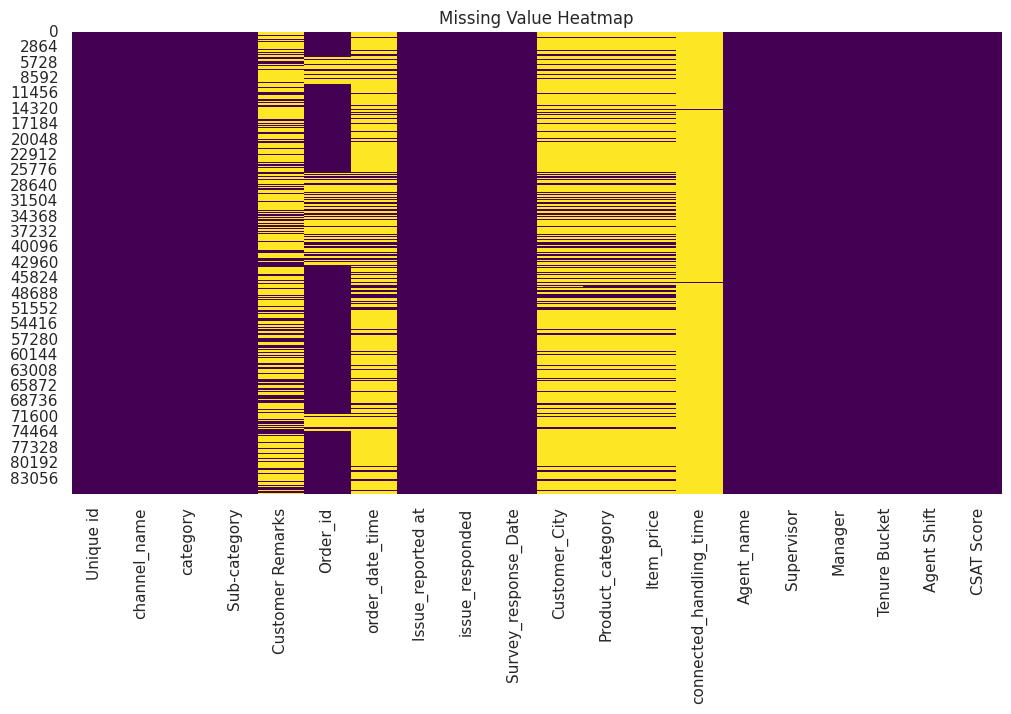

In [169]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

#yellow area=missing values

###Bar plot

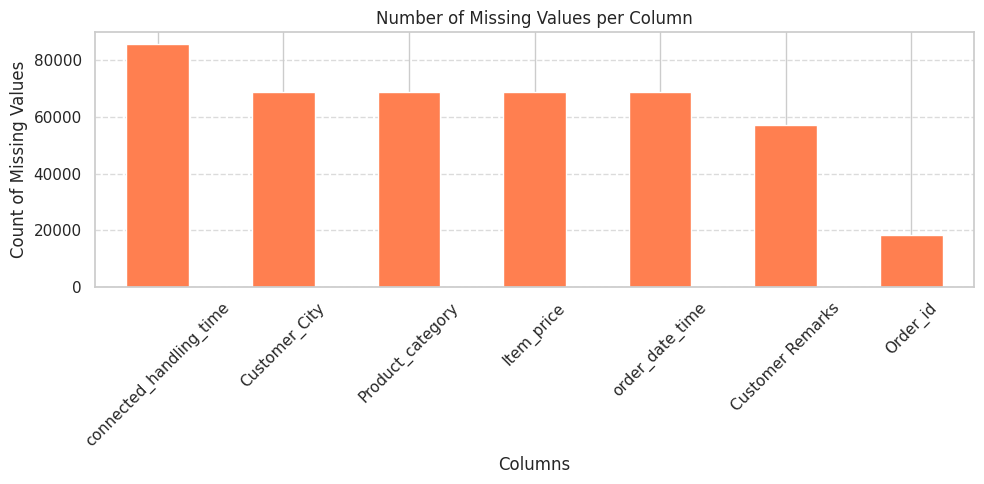

In [170]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
plt.figure(figsize=(10, 5))
missing.plot(kind='bar', color='coral')
plt.title('Number of Missing Values per Column')
plt.ylabel('Count of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##What did you know about your dataset?

#2.Understanding Your Variables

In [171]:
#columns
col_list=df.columns.tolist()
for i in col_list:
  print(i)

Unique id
channel_name
category
Sub-category
Customer Remarks
Order_id
order_date_time
Issue_reported at
issue_responded
Survey_response_Date
Customer_City
Product_category
Item_price
connected_handling_time
Agent_name
Supervisor
Manager
Tenure Bucket
Agent Shift
CSAT Score


In [172]:
#describe df
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


##Variables Description

In [173]:
varDesc = pd.DataFrame({
    'Data Type': df.dtypes.astype(str),
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})
varDesc

,Data Type,Missing Values,Unique Values
Unique id,object,0,85907
channel_name,object,0,3
category,object,0,12
Sub-category,object,0,57
Customer Remarks,object,57165,18231
Order_id,object,18232,67675
order_date_time,object,68693,13766
Issue_reported at,object,0,30923
issue_responded,object,0,30262
Survey_response_Date,object,0,31


##No of Unique Values for each variable.

In [174]:
#unique values per col
uniqueVal=pd.DataFrame({
    "unique values":df.nunique(),
    "total value":df.count()
})
uniqueVal

,unique values,total value
Unique id,85907,85907
channel_name,3,85907
category,12,85907
Sub-category,57,85907
Customer Remarks,18231,28742
Order_id,67675,67675
order_date_time,13766,17214
Issue_reported at,30923,85907
issue_responded,30262,85907
Survey_response_Date,31,85907


#3.Data Wrangling

##Droping Irrelevant Columns

In [175]:
df.drop(['Unique id', 'Order_id', 'Customer Remarks', 'order_date_time'], axis=1, inplace=True)

##Handling Date Columns

In [176]:
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce')
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce')

##Creating new relevant columns

In [177]:
#Response Time = issue_responded - Issue_reported at (in minutes)
df['response_time_mins'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

##Handling Missing Values

In [178]:
df.isnull().sum()

,0
channel_name,0
category,0
Sub-category,0
Issue_reported at,53933
issue_responded,54022
Survey_response_Date,0
Customer_City,68828
Product_category,68711
Item_price,68701
connected_handling_time,85665


In [179]:
#Item_price
df['Item_price'].fillna(df['Item_price'].median(), inplace=True) #Impute missing values with median
#connected_handling_time
df.drop('connected_handling_time', axis=1, inplace=True) #drop this col to prevent noisy data
#Customer_City and Product_category
df.drop(['Customer_City', 'Product_category'], axis=1, inplace=True) #dropping

##Handle Categorical Variables with Missing/Noisy Values

In [180]:
for col in ['Agent_name', 'Supervisor', 'Manager' , 'category' , 'Sub-category' , 'Tenure Bucket' , 'Agent Shift']:
    df[col] = df[col].str.strip().str.lower() ##removing whitespaces and ensuring all words are in lowercase
for col in ['Agent_name', 'Supervisor', 'Manager', 'category', 'Sub-category', 'Tenure Bucket', 'Agent Shift']:
    print("____________________________________________________")
    print(f"\nUNIQUE VALUES IN {col}:")
    print(df[col].value_counts())



____________________________________________________

UNIQUE VALUES IN Agent_name:
Agent_name
wendy taylor         429
timothy huff         265
david smith          264
jamie smith          253
kayla wilson         216
                    ... 
jackson brown         20
alexis murray         20
matthew ross          20
stephanie hammond     20
amy bell              20
Name: count, Length: 1371, dtype: int64
____________________________________________________

UNIQUE VALUES IN Supervisor:
Supervisor
carter park         4273
elijah yamaguchi    3855
zoe yamamoto        3551
nathan patel        3549
noah patel          3434
ava wong            3373
emma park           3290
mia patel           3279
evelyn kimura       2974
aiden patel         2892
madison kim         2772
william park        2692
scarlett chen       2676
emily yamashita     2581
jackson park        2571
brayden wong        2540
logan lee           2466
olivia wang         2233
abigail suzuki      2222
olivia suzuki       21

##What all manipulations have you done and insights you found?

#4.Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

In [181]:
# Convert date columns to datetime for further visualizations
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce')
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')

# Create a column for response time in minutes
df['response_time_min'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

# Truncate data for performance where needed
df_short = df.sample(5000, random_state=42)

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Prepare charts
charts = []


<Figure size 1400x600 with 0 Axes>

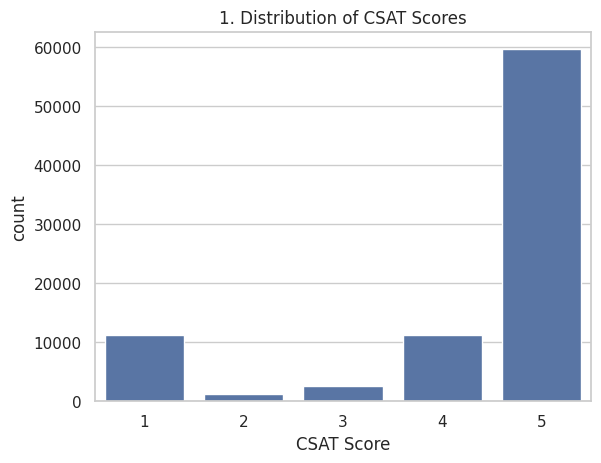

In [182]:
# 1. Distribution of CSAT scores
charts.append(sns.countplot(data=df, x='CSAT Score'))
plt.title("1. Distribution of CSAT Scores")
plt.show()

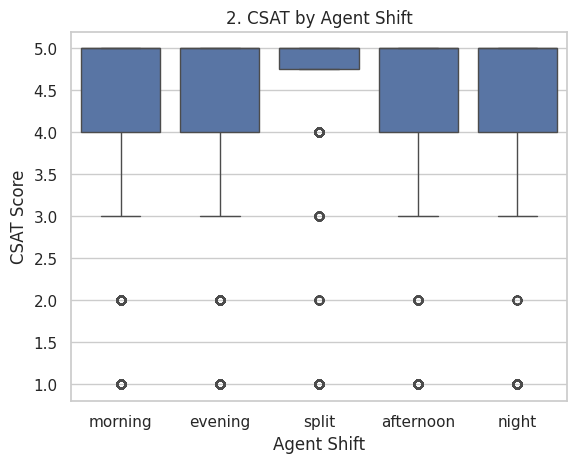

In [183]:
# 2. CSAT by Agent Shift
charts.append(sns.boxplot(data=df, x='Agent Shift', y='CSAT Score'))
plt.title("2. CSAT by Agent Shift")
plt.show()

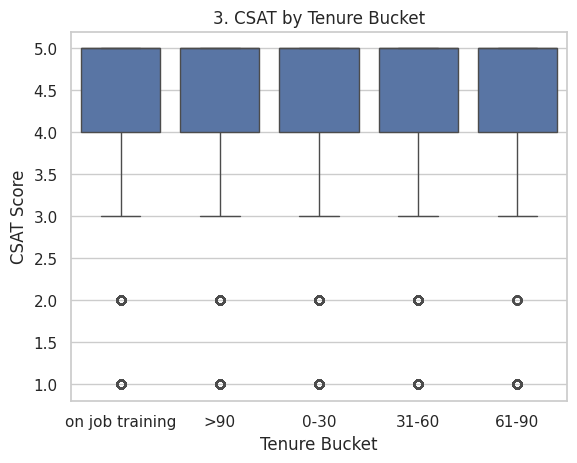

In [184]:
# 3. CSAT by Tenure Bucket
charts.append(sns.boxplot(data=df, x='Tenure Bucket', y='CSAT Score'))
plt.title("3. CSAT by Tenure Bucket")
plt.show()

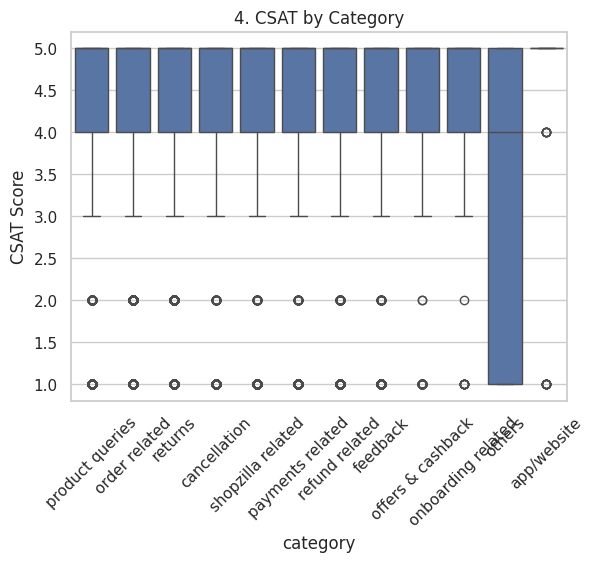

In [185]:
# 4. CSAT by Category
charts.append(sns.boxplot(data=df, x='category', y='CSAT Score'))
plt.title("4. CSAT by Category")
plt.xticks(rotation=45)
plt.show()

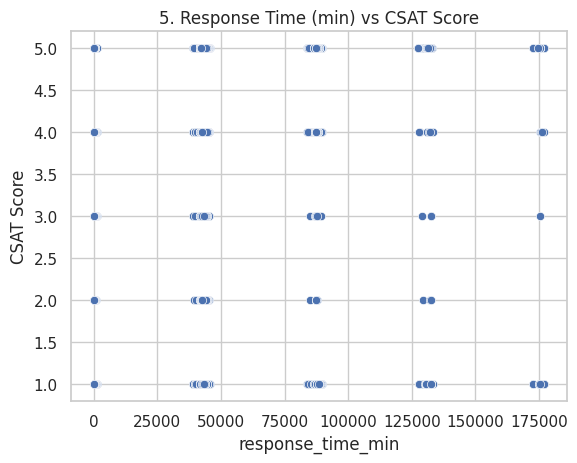

In [186]:
# 5. Response Time vs CSAT
charts.append(sns.scatterplot(data=df, x='response_time_min', y='CSAT Score'))
plt.title("5. Response Time (min) vs CSAT Score")
plt.show()

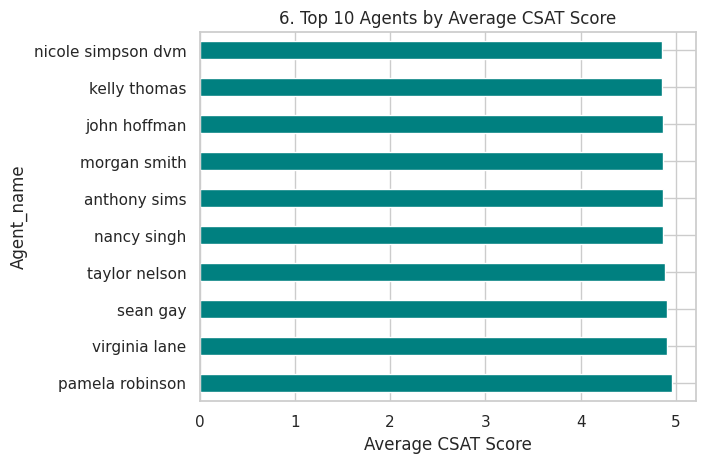

In [187]:
# 6. Top 10 Agents by Average CSAT
top_agents = df.groupby('Agent_name')['CSAT Score'].mean().sort_values(ascending=False).head(10)
charts.append(top_agents.plot(kind='barh', color='teal'))
plt.title("6. Top 10 Agents by Average CSAT Score")
plt.xlabel("Average CSAT Score")
plt.show()

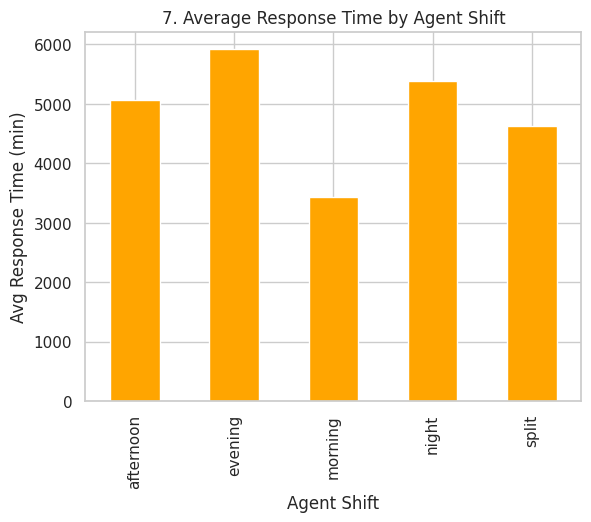

In [188]:
# 7. Average Response Time by Agent Shift
avg_resp_by_shift = df.groupby('Agent Shift')['response_time_min'].mean()
charts.append(avg_resp_by_shift.plot(kind='bar', color='orange'))
plt.title("7. Average Response Time by Agent Shift")
plt.ylabel("Avg Response Time (min)")
plt.show()

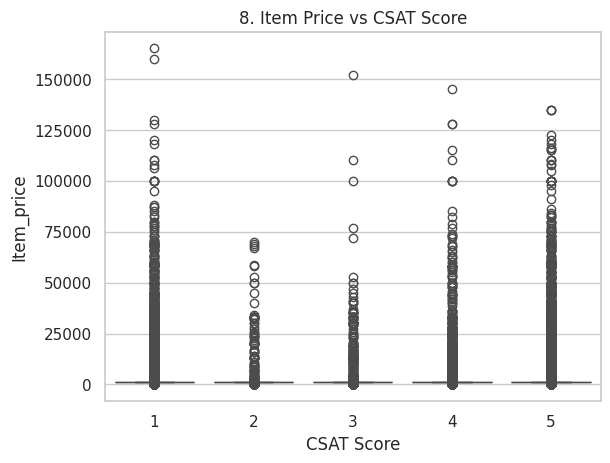

In [189]:
# 8. Item Price vs CSAT
charts.append(sns.boxplot(data=df, x='CSAT Score', y='Item_price'))
plt.title("8. Item Price vs CSAT Score")
plt.show()

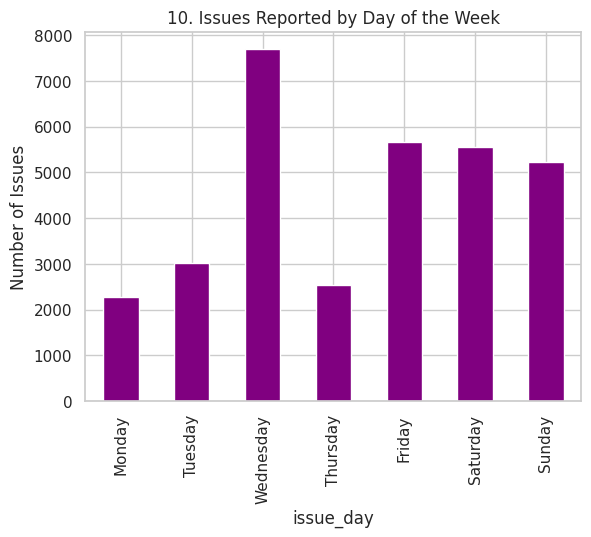

In [190]:
# 10. Number of issues reported by day of the week
df['issue_day'] = df['Issue_reported at'].dt.day_name()
charts.append(df['issue_day'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).plot(kind='bar', color='purple'))
plt.title("10. Issues Reported by Day of the Week")
plt.ylabel("Number of Issues")
plt.show()

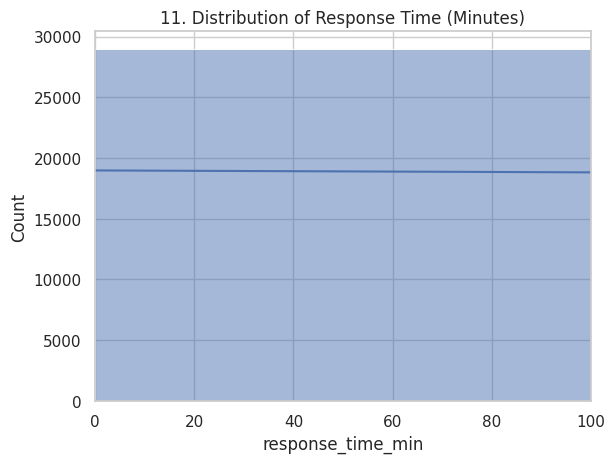

In [191]:
# 11. Response Time Distribution
charts.append(sns.histplot(df['response_time_min'], bins=50, kde=True))
plt.title("11. Distribution of Response Time (Minutes)")
plt.xlim(0, 100)
plt.show()

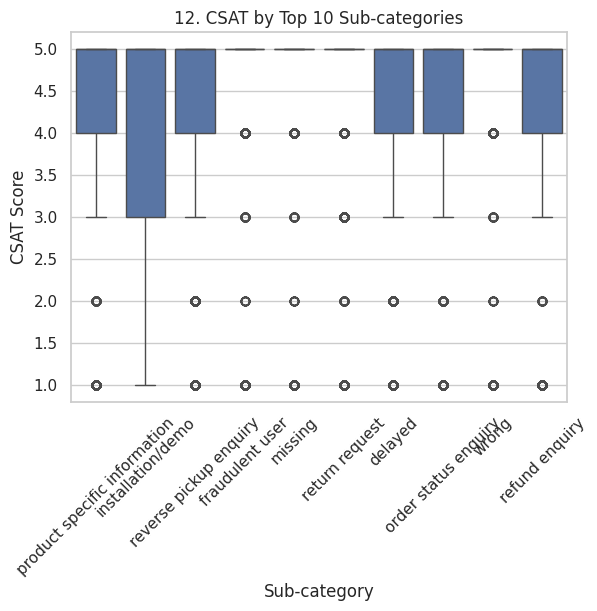

In [192]:
# 12. CSAT by Sub-category (Top 10)
top_subcats = df['Sub-category'].value_counts().nlargest(10).index
charts.append(sns.boxplot(data=df[df['Sub-category'].isin(top_subcats)],
                          x='Sub-category', y='CSAT Score'))
plt.title("12. CSAT by Top 10 Sub-categories")
plt.xticks(rotation=45)
plt.show()


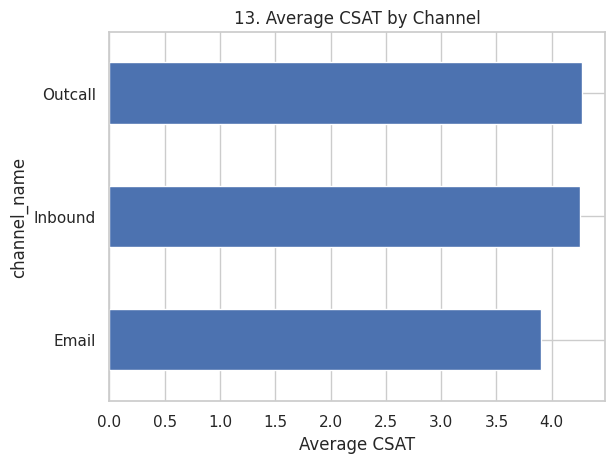

In [193]:
# 13. Average CSAT by Channel
charts.append(df.groupby('channel_name')['CSAT Score'].mean().sort_values().plot(kind='barh'))
plt.title("13. Average CSAT by Channel")
plt.xlabel("Average CSAT")
plt.show()

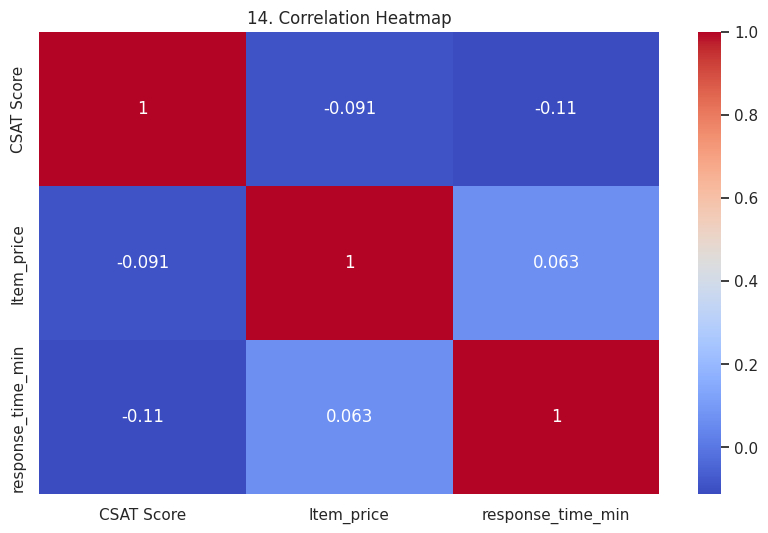

In [194]:
# 14. Correlation Heatmap
plt.figure(figsize=(10, 6))
charts.append(sns.heatmap(df[['CSAT Score', 'Item_price', 'response_time_min']].corr(), annot=True, cmap='coolwarm'))
plt.title("14. Correlation Heatmap")
plt.show()

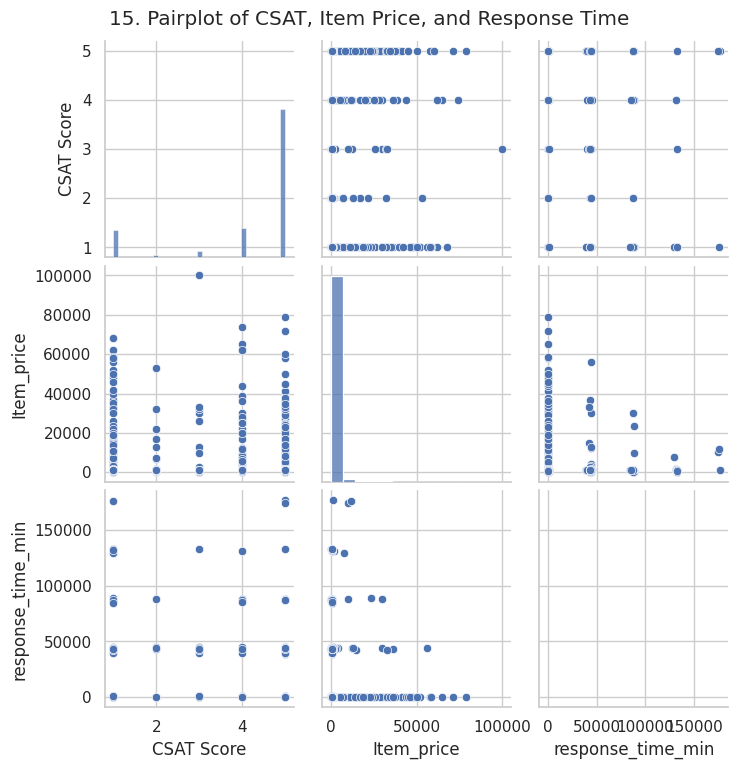

In [195]:
# 15. Pairplot of numerical features
charts.append(sns.pairplot(df_short[['CSAT Score', 'Item_price', 'response_time_min']]))
plt.suptitle("15. Pairplot of CSAT, Item Price, and Response Time", y=1.02)
plt.show()

#5.Hypothesis Testing

#7.ML Model Implementation